In [3]:
import numpy as np
import networkx as nx
from grakel import GraphKernel
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

In [4]:
import GraphRicciCurvature
from GraphRicciCurvature.FormanRicci import FormanRicci

In [5]:
import networkx as nx
from torch_geometric.datasets import TUDataset

# Specify the name of the dataset you want to load
dataset_name = 'ENZYMES'  # Example dataset name

# Load the dataset
dataset = TUDataset(root='data/TUDataset', name=dataset_name)

# Get the first graph from the dataset
data = dataset[0]

# Convert PyG data to NetworkX graph
G = nx.Graph()
G.add_edges_from(data.edge_index.T.numpy())

# Compute edge weights (e.g., using edge betweenness centrality)
edge_weights = nx.edge_betweenness_centrality(G)

# Print edge weights
print("Edge weights:")
for edge, weight in edge_weights.items():
    print(f"Edge {edge}: weight = {weight}")


Processing...


Edge weights:
Edge (0, 1): weight = 0.010522427189093846
Edge (0, 2): weight = 0.015193765193765188
Edge (0, 3): weight = 0.028337861671194984
Edge (1, 2): weight = 0.0030655655655655654
Edge (1, 3): weight = 0.014326826826826828
Edge (1, 24): weight = 0.024593045426378753
Edge (1, 27): weight = 0.02309154392487725
Edge (2, 3): weight = 0.01051051051051051
Edge (2, 27): weight = 0.01689785023118355
Edge (2, 28): weight = 0.03889901806568468
Edge (3, 4): weight = 0.0233417941751275
Edge (3, 5): weight = 0.04229825063158401
Edge (3, 28): weight = 0.03620882787549452
Edge (24, 27): weight = 0.002002002002002002
Edge (24, 28): weight = 0.006819319319319318
Edge (24, 29): weight = 0.06131726965060302
Edge (27, 28): weight = 0.006068568568568568
Edge (27, 29): weight = 0.07496186662853331
Edge (28, 26): weight = 0.06940273606940275
Edge (28, 29): weight = 0.043993398160064846
Edge (4, 5): weight = 0.003503503503503503
Edge (4, 6): weight = 0.030405405405405404
Edge (4, 29): weight = 0.068637

Done!


### nx.spring_layout(G) is a function from the NetworkX library used to compute the positions of nodes in a graph using a force-directed layout algorithm called the "spring layout."

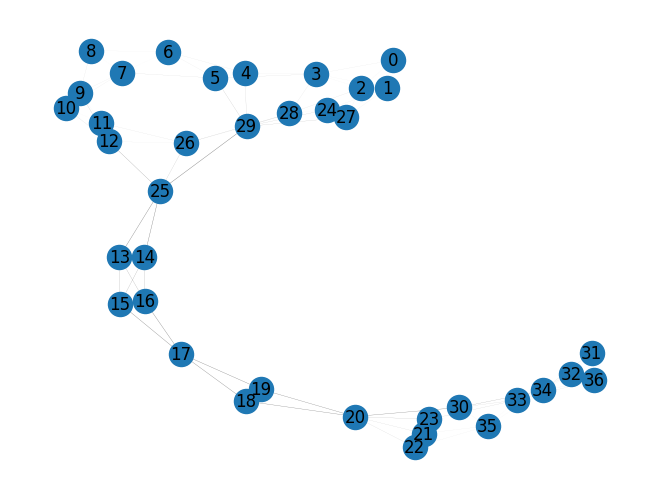

In [6]:
pos = nx.spring_layout(G) 

nx.draw(G, pos, with_labels=True, width=[edge_weights[edge] for edge in G.edges()], edge_color='gray')

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

### scale the edge weights to fit within a reasonable range for visualization.

In [7]:
max_weight = max(edge_weights.values())
min_weight = min(edge_weights.values())
scaled_weights = [(weight - min_weight) / (max_weight - min_weight) for weight in edge_weights.values()]

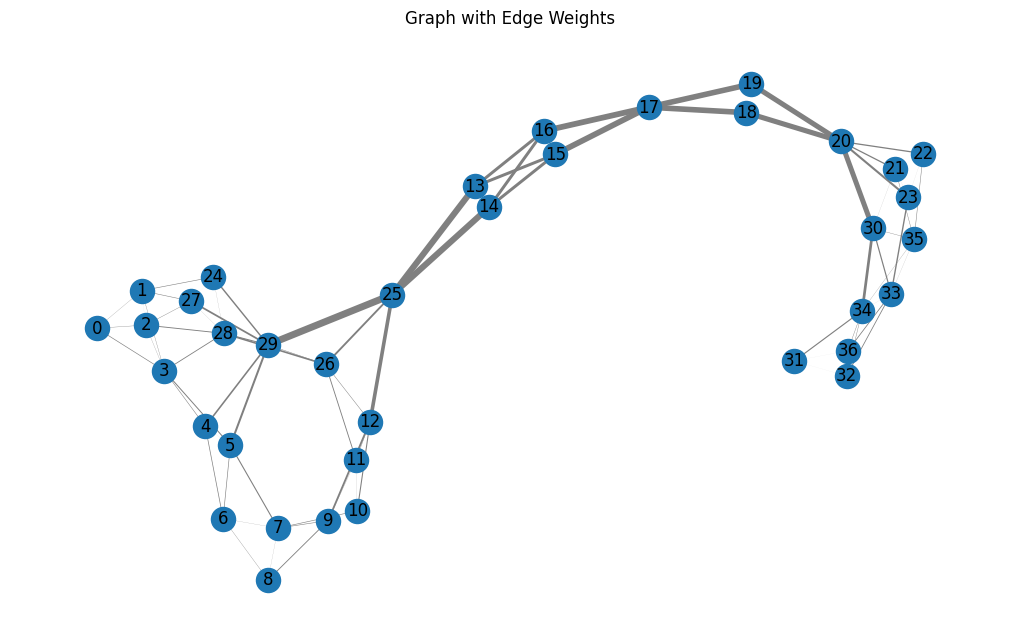

In [8]:
# Draw the graph with edge weights
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)  # Position nodes using the spring layout algorithm
nx.draw(G, pos, with_labels=True, width=[weight * 5 for weight in scaled_weights], edge_color='gray')
plt.title('Graph with Edge Weights')
plt.show()

TypeError: unhashable type: 'set'

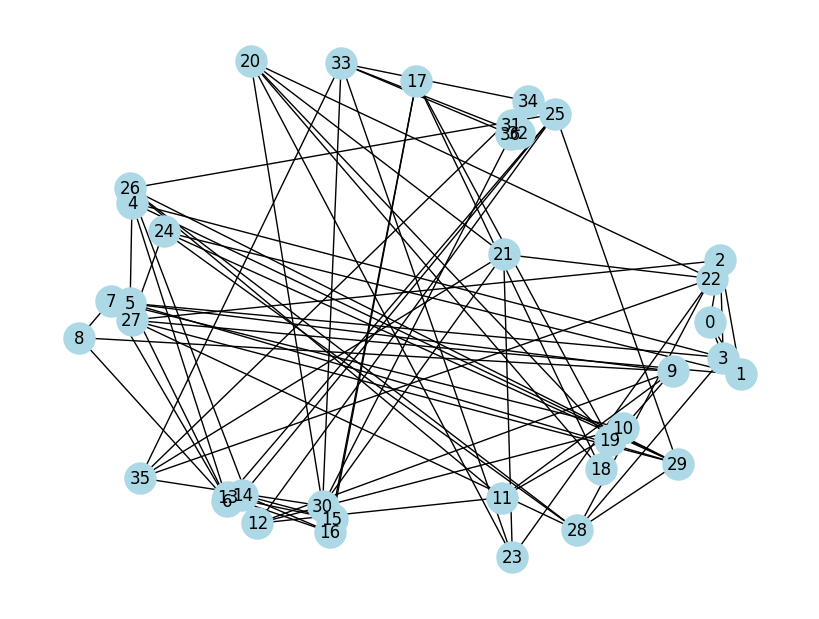

In [9]:
G1 = G.copy() # Keep a copy
frc = FormanRicci(G1, verbose="TRACE")
frc.compute_ricci_curvature()

# Assign Forman-Ricci curvature as weights to edges
for u, v, d in G1.edges(data=True):
    d['weight'] = frc.G[u][v]['formanCurvature']

# Community detection based on edge weights
communities = nx.algorithms.community.centrality.girvan_newman(G)

# Plot the graph with communities
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G1)
nx.draw(G1, pos, with_labels=True, node_color='lightblue', node_size=500)
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G1, pos, nodelist=community, node_color=f'C{i}', node_size=500, label=f'Community {i+1}')
nx.draw_networkx_edges(G1, pos, width=1.0, alpha=0.5)
plt.legend()
plt.title('Community Detection using Ricci Flow (Forman-Ricci)')
plt.show()

TypeError: unhashable type: 'set'

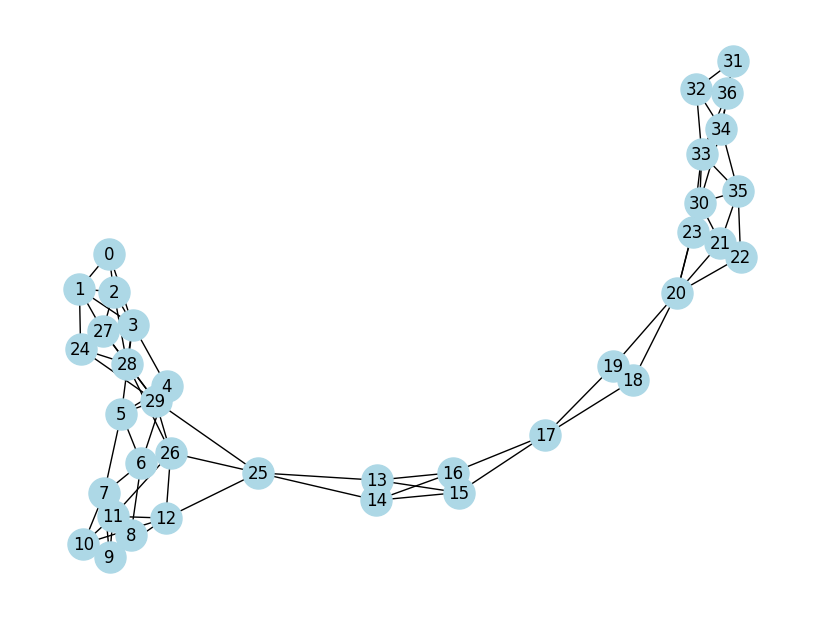

In [10]:
G2 = G.copy()
frc2 = FormanRicci(G2)
frc2.compute_ricci_curvature()

# Assign Forman-Ricci curvature as weights to edges
for u, v, d in G2.edges(data=True):
    G2[u][v]['weight'] = frc2.G[u][v]['formanCurvature']

# Compute edge betweenness centrality considering edge weights
edge_betweenness = nx.edge_betweenness_centrality(G2, weight='weight')

# Community detection based on edge betweenness centrality
communities = nx.algorithms.community.centrality.girvan_newman(G)

# Plot the graph with communities
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
pos = {node: (pos[node][0], pos[node][1]) for node in pos}  # Convert pos values to tuples

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=list(community), node_color=f'C{i}', node_size=500, label=f'Community {i+1}')
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
plt.legend()
plt.title('Community Detection using Ricci Flow (Forman-Ricci)')
plt.show()

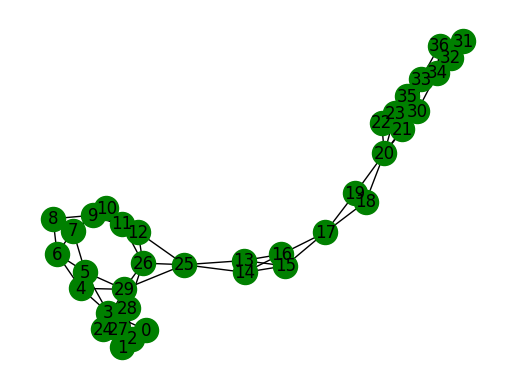

In [11]:

# Compute Forman-Ricci curvature using GraphRicciCurvature library
G3 = G.copy()
frc = FormanRicci(G3)
frc.compute_ricci_curvature()

# Assign Forman-Ricci curvature as weights to edges
edge_weights = {}
for u, v, d in G3.edges(data=True):
    edge_weights[(u, v)] = frc.G[u][v]['formanCurvature']

def community_detection_forman_ricci(G, threshold):
  """
  Performs community detection using Forman-Ricci curvature and a threshold on curvature.

  Args:
      G: A NetworkX graph object.
      threshold: Threshold for removing edges with high curvature (weak connections).

  Returns:
      A dictionary mapping nodes to their assigned communities.
  """
  # Use GraphRicciCurvature library for Forman-Ricci curvature calculation
  frc = FormanRicci(G)
  curvature = frc.compute_edge_ricci_curvature()

  communities = {}
  next_community = 0

  # Remove edges with high curvature (weak connections)
  for edge, value in curvature.items():
    if abs(value) > threshold:
      G.remove_edge(*edge)

  # Assign nodes to communities based on connected components
  for component in nx.connected_components(G):
    for node in component:
      communities[node] = next_community
    next_community += 1

  return communities


    
# Community detection based on edge weights
#communities = nx.algorithms.community.centrality.girvan_newman(G3)
def plot_communities(G, communities, node_color):
  """
  Plots the graph with nodes colored according to their communities.

  Args:
      G: A NetworkX graph object.
      communities: A dictionary mapping nodes to their assigned communities.
      node_color: A color mapping function for nodes based on their communities.
  """
  pos = nx.spring_layout(G)  # Use any layout algorithm
  nx.draw_networkx(G, pos=pos, nodelist=G.nodes(), node_color='green', with_labels=True)
  plt.axis('off')
  plt.show()



# Set parameters
alpha = 0.5
threshold = 0.1

# Community detection based on edge betweenness centrality
communities = nx.algorithms.community.centrality.girvan_newman(G)

# Define node coloring based on communities
def community_color(comm):
  colors = ['red', 'green', 'blue', 'purple']  # Adjust colors as needed
  return colors[comm % len(colors)]  # Map community ID to a color

# Plot the communities
plot_communities(G, communities, community_color)

In [ ]:
for i, community in enumerate(communities):
    nodes_in_community = list(community)
    nx.draw_networkx_nodes(G3, pos, nodelist=nodes_in_community, node_color=f'C{i}', node_size=500, label=f'Community {i+1}')
    print(f"Community {i+1}:", nodes_in_community)  # Print community information
